In [1]:
from coders import BitStream, WavStream
from coders import SimpleASK as Coder
import scipy.io.wavfile

In [2]:
input_stream = BitStream(np.random.randint(2, size=20))
encoded = Coder.encode(input_stream)
scipy.io.wavfile.write('test.wav', Coder.rate.current, encoded)
read_rate, read = scipy.io.wavfile.read('test.wav')
noisy = np.random.normal(0, 1, len(read)) * 0.2 + read

In [3]:
wavstream = WavStream(noisy, read_rate, int(round(Coder.rate.current * Coder.symbol_duration.current)))
verification = input_stream.assymbolsize(2)
decoded = Coder.decode(read_rate, wavstream)
check = verification == decoded

Main vars: 8820 88200 441 [ 0.2   0.47  0.73  1.  ]
Filter vars: 84 0.5 42
Peak vars: 88 1 [88]
peak 0.5
peak 1.06
peak 0.23
peak 0.22
peak 0.5
peak 1.06
peak 0.51
peak 0.23
peak 0.5
peak 1.06


Length: 88200
Quality: 1.0


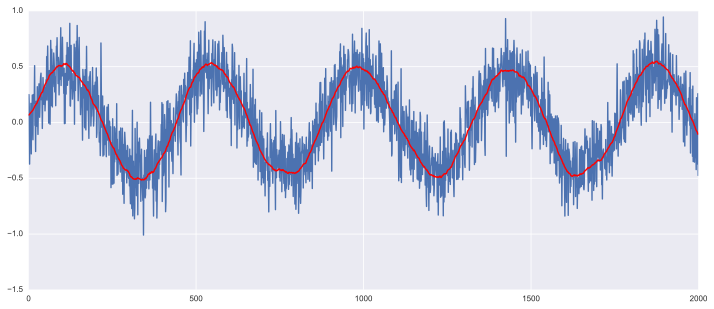

In [4]:
lim = (0, 2000)
sns.tsplot(wavstream[lim[0]:lim[1]])
sns.tsplot(wavstream.filter(80, 0.5, 50)[lim[0]:lim[1]], color='r')
print('Length:', len(wavstream))
print('Quality:', check.sum()/len(check))